In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
%matplotlib inline
plt.style.use('ggplot')


In [2]:
df = pd.read_csv('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/data/NFL Play by Play 2009-2018 (v5).csv', low_memory=False)
df = df[df['quarter_end'] == 0]
# df = df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
#         'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
#         'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
#         'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
#         'quarter_end', 'field_goal_result', 'kick_distance']]
df_4 = df[df['down'] == 4.0]
date = pd.to_datetime(df_4['game_date'].values)
df_4['game_date'] = date
df_4['year'] = date.year

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [3]:
#percent of plays that are not punts 
#40% 
df_4[df_4['play_type'] != 'punt'].shape[0] / (df_4[df_4['play_type'] == 'punt'].shape[0] + df_4[df_4['play_type'] != 'punt'].shape[0])

0.39683180304711935

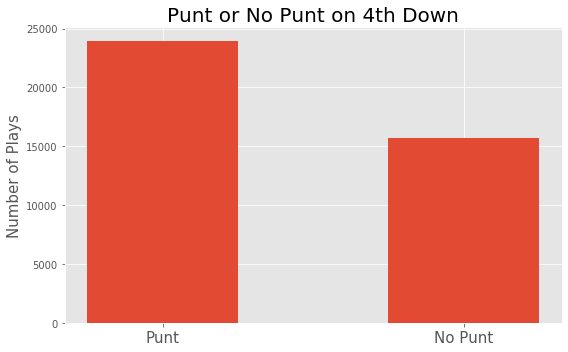

In [4]:
plt.figure(figsize=(8,5))
plt.title('Punt or No Punt on 4th Down', size=20)
plt.ylabel('Number of Plays', size=15)
plt.xticks(size=15)
plt.bar(['Punt', 'No Punt'], [df_4[df_4['play_type'] == 'punt'].shape[0] , df_4[df_4['play_type'] != 'punt'].shape[0]], width=0.5)
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/punt_nopunt.png');

In [5]:
punt_per_game = df_4[df_4['play_type'] == 'punt'].groupby('game_id').count().iloc[:, 1].values
notpunt_per_game = df_4[df_4['play_type'] != 'punt'].groupby('game_id').count().iloc[:, 1].values

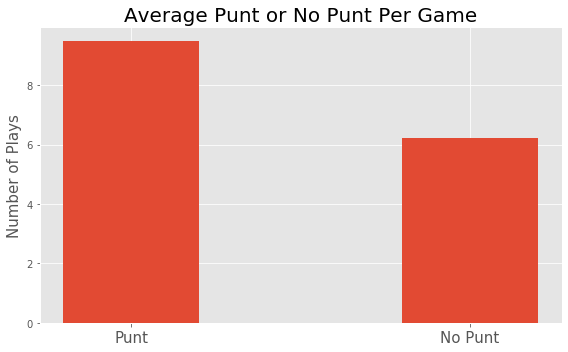

In [6]:
plt.figure(figsize=(8,5))
plt.title('Average Punt or No Punt Per Game', size=20)
plt.ylabel('Number of Plays', size=15)
plt.xticks(size=15)
plt.bar(['Punt', 'No Punt'], [np.mean(punt_per_game), np.mean(notpunt_per_game)], width=0.4)
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/avg_punt_game.png');

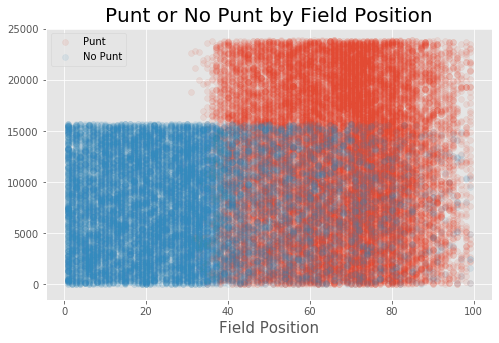

In [7]:
#dont use this plt, use the histogram below
plt.figure(figsize=(8,5))
plt.title('Punt or No Punt by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.scatter(y=np.arange(len(df_4[df_4['play_type'] == 'punt']['yardline_100'].values)), x=df_4[df_4['play_type'] == 'punt']['yardline_100'].values, alpha=0.1, label='Punt')
plt.scatter(y=np.arange(len(df_4[df_4['play_type'] != 'punt']['yardline_100'].values)), x=df_4[df_4['play_type'] != 'punt']['yardline_100'].values, alpha=0.1, label='No Punt')
plt.legend()

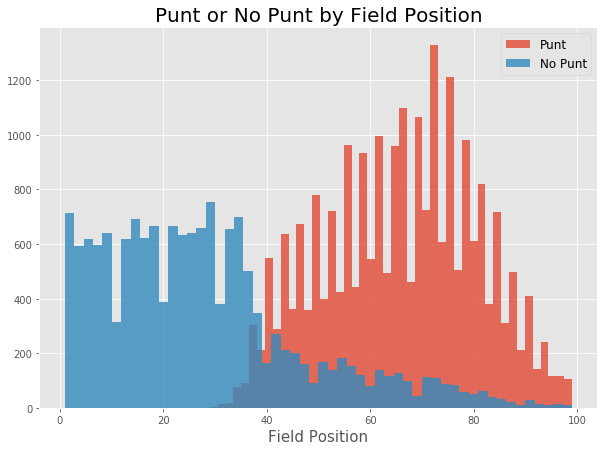

In [8]:
plt.figure(figsize=(10,7))
plt.title('Punt or No Punt by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.hist(df_4[df_4['play_type'] == 'punt']['yardline_100'].dropna().values, bins='fd', alpha=0.8, label='Punt')
plt.hist(df_4[df_4['play_type'] != 'punt']['yardline_100'].dropna().values, bins='fd', alpha=0.8, label='No Punt')
#plt.fill_between(x, np.exp(logprob), alpha=0.5)
plt.legend(fontsize='large')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/field_position.png');

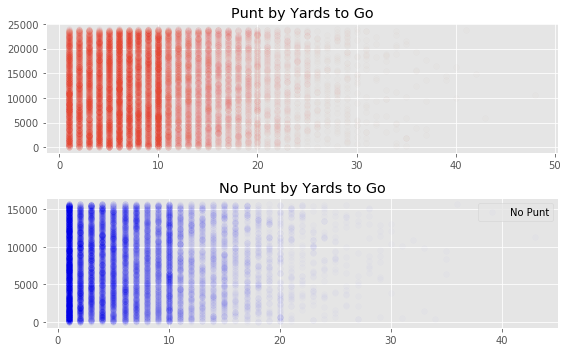

In [9]:
#also not a good visual representation
fig, ax = plt.subplots(2, 1, figsize=(8,5))
ax[0].set_title('Punt by Yards to Go')
ax[0].scatter(y=np.arange(len(df_4[df_4['play_type'] == 'punt']['ydstogo'].values)), x=df_4[df_4['play_type'] == 'punt']['ydstogo'].values, alpha=0.01, label='Punt')
ax[1].set_title('No Punt by Yards to Go')
ax[1].scatter(y=np.arange(len(df_4[df_4['play_type'] != 'punt']['ydstogo'].values)), x=df_4[df_4['play_type'] != 'punt']['ydstogo'].values, alpha=0.01, label='No Punt', c='b')
plt.legend()
plt.tight_layout()

In [10]:
punt = df_4[df_4['play_type'] == 'punt'].groupby('ydstogo').count().iloc[:10, 1]
not_punt = df_4[df_4['play_type'] != 'punt'].groupby('ydstogo').count().iloc[:10, 1]

In [11]:
#finds percent of total plays for first 10 yards
pct_not_punt = []
for x in not_punt:
    pct_not_punt.append(x / sum(not_punt))
    
    pct_punt = []
for x in punt:
    pct_punt.append(x / sum(punt))

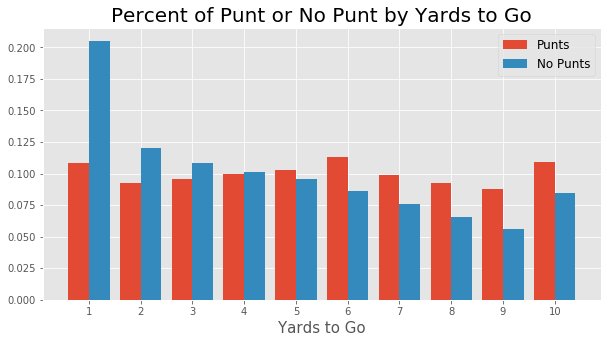

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(np.arange(10)-0.2, pct_punt, width=0.4, label='Punts')
#plt.xticks([1, 2, 3, 4, 5,6 ,7, 8, 9, 10])
plt.title('Percent of Punt or No Punt by Yards to Go', size=20)
plt.xticks(ticks = np.arange(10), labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Yards to Go', size=15)
plt.bar(np.arange(10)+0.2, pct_not_punt, width=0.4, label='No Punts')
plt.legend(fontsize='large')
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/yds_to_go.png');

In [34]:
half_50_punt = df_4[df_4['play_type'] == 'punt'][['play_id', 'half_seconds_remaining']].groupby('half_seconds_remaining').count().iloc[:60]['play_id'].values
half_50_nopunt = df_4[df_4['play_type'] != 'punt'][['play_id', 'half_seconds_remaining']].groupby('half_seconds_remaining').count().iloc[:60]['play_id'].values

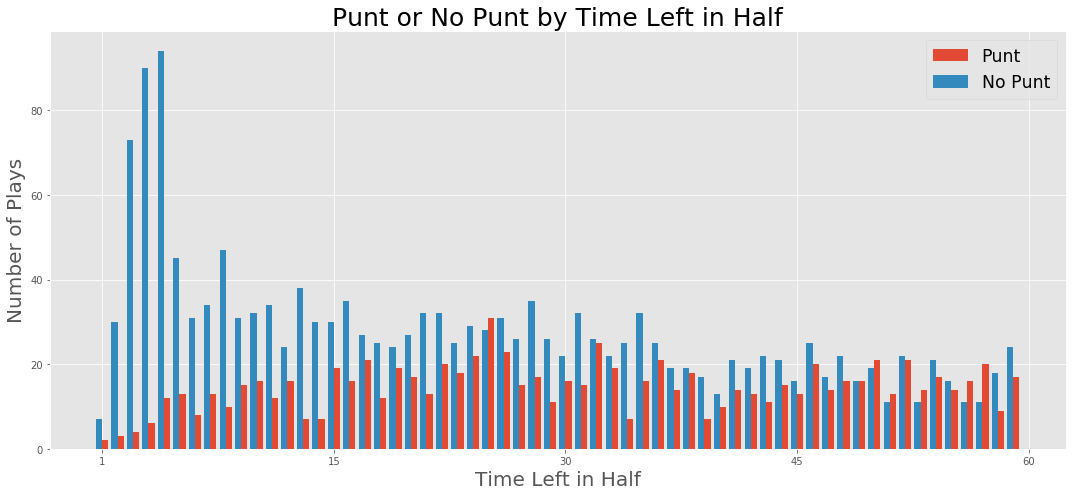

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Punt or No Punt by Time Left in Half', size=25)
plt.bar(np.arange(60)+0.2, half_50_punt, label='Punt', width=0.4)
plt.bar(np.arange(60)-0.2, half_50_nopunt, label='No Punt', width=0.4)
plt.xticks(ticks=np.arange(0, 61, 15), labels=[1, 15, 30, 45, 60])
plt.xlabel('Time Left in Half', size=20)
plt.ylabel('Number of Plays', size=20)
plt.legend(fontsize='xx-large')
plt.tight_layout()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/sec_left_half.png');

In [36]:
year_nopunt = df_4[df_4['play_type'] != 'punt'].groupby('year').count().iloc[:, 1].values
year_punt = df_4[df_4['play_type'] == 'punt'].groupby('year').count().iloc[:, 1].values

In [37]:
#calculating no punts over total punts for that year
total_year_pct = []
for x, y in zip(year_nopunt, year_punt):
    total_year_pct.append(x/(x+y))

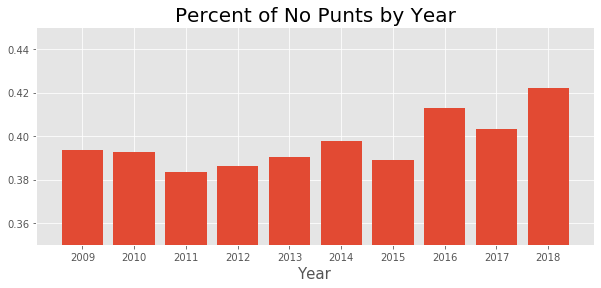

In [38]:
plt.figure(figsize=(10, 4))
plt.title('Percent of No Punts by Year', size=20)
plt.ylim(.35, .45)
plt.xticks(df_4['year'].unique(), size=10)
plt.xlabel('Year', size=15)
plt.bar(df_4['year'].unique(), total_year_pct)
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/year.png');

In [39]:
qtr_nopunt = df_4[df_4['play_type'] != 'punt'].groupby('qtr').count().iloc[:, 1].values
qtr_punt = df_4[df_4['play_type'] == 'punt'].groupby('qtr').count().iloc[:, 1].values

In [40]:
qtr_nopunt_totals = []
for x, y in zip(qtr_nopunt, qtr_punt):
    qtr_nopunt_totals.append(x / (x+y))

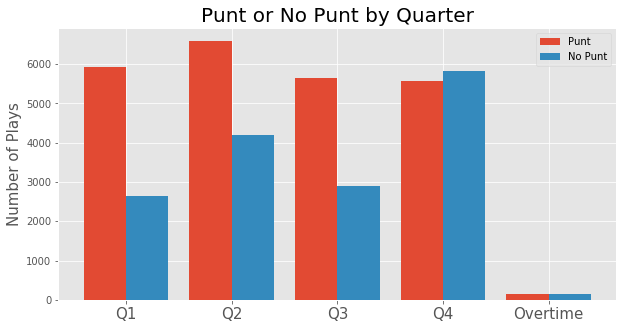

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Punt or No Punt by Quarter', size=20)
plt.ylabel('Number of Plays', size=15)
plt.bar(np.arange(0, 5) - 0.2, qtr_punt, label='Punt', width=0.4)
plt.bar(np.arange(0, 5) +0.2, qtr_nopunt, label='No Punt', width=0.4)
plt.xticks(ticks=np.arange(5), labels=['Q1', 'Q2', 'Q3', 'Q4', 'Overtime'], size=15)
plt.legend()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/quarter.png');

In [42]:
score_diff_punt = df_4[(df_4['play_type'] == 'punt') & (df_4['score_differential'] > 0)].shape[0]
score_diffneg_punt = df_4[(df_4['play_type'] == 'punt') & (df_4['score_differential'] < 0)].shape[0]
score_diff0_punt = df_4[(df_4['play_type'] == 'punt') & (df_4['score_differential'] == 0)].shape[0]

score_diff_nopunt = df_4[(df_4['play_type'] != 'punt') & (df_4['score_differential'] > 0)].shape[0]
score_diffneg_nopunt = df_4[(df_4['play_type'] != 'punt') & (df_4['score_differential'] < 0)].shape[0]
score_diff0_nopunt = df_4[(df_4['play_type'] != 'punt') & (df_4['score_differential'] == 0)].shape[0]

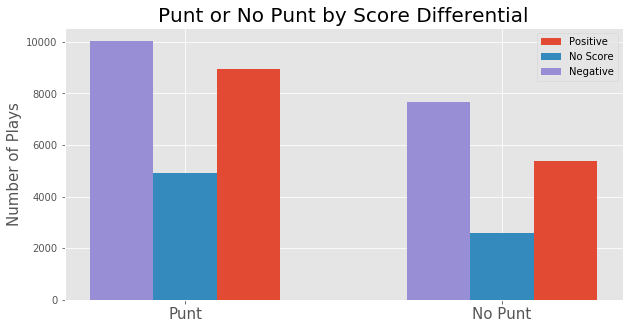

In [43]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(2) + 0.2, [score_diff_punt, score_diff_nopunt], label='Positive', width=0.2)
plt.title('Punt or No Punt by Score Differential', size=20)
plt.bar(np.arange(2), [score_diff0_punt, score_diff0_nopunt], label='No Score', width=0.2)
plt.bar(np.arange(2) - 0.2, [score_diffneg_punt, score_diffneg_nopunt], label='Negative', width=0.2)
plt.xticks(ticks=[0,1], labels=['Punt', 'No Punt'], size=15)
plt.ylabel('Number of Plays', size=15)
plt.legend()
plt.savefig('/Users/morganabbitt/galvanize/capstone/NFL-Analytics/graphics/score_diff.png');

In [44]:
#df_4[['yardline_100', 'year', 'half_seconds_remaining', 'drive', 'down', 'qtr'] ]

## These Plots emphasize 2 classifications, punting or not punting on 4th down.

The plan is to analyze similar features for 3 classifications on 4th down, field goals, punts, and "go for it".

In [56]:
punt_df = df_4[df_4['play_type'] == 'punt']
fg_df = df_4[df_4['play_type'] == 'field_goal']
run_pass_df = df_4[(df_4['play_type'] == 'pass') | (df_4['play_type'] == 'run') | (df_4['play_type'] == 'qb_kneel')]

In [64]:
punt_pc = punt_df.shape[0] / df_4.shape[0]
fg_pc = fg_df.shape[0] / df_4.shape[0]
run_pass_pc = run_pass_df.shape[0] / df_4.shape[0]

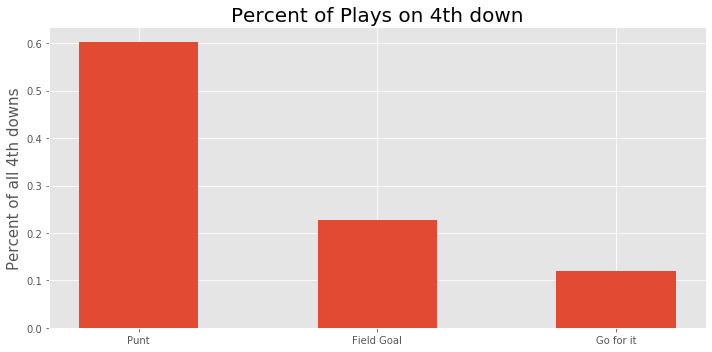

In [143]:
plt.figure(figsize=(10,5))
plt.title('Percent of Plays on 4th down', size=20)
plt.ylabel('Percent of all 4th downs', size=15)
plt.bar(['Punt', 'Field Goal', 'Go for it'], [punt_pc, fg_pc, run_pass_pc], width=0.5)
plt.tight_layout()

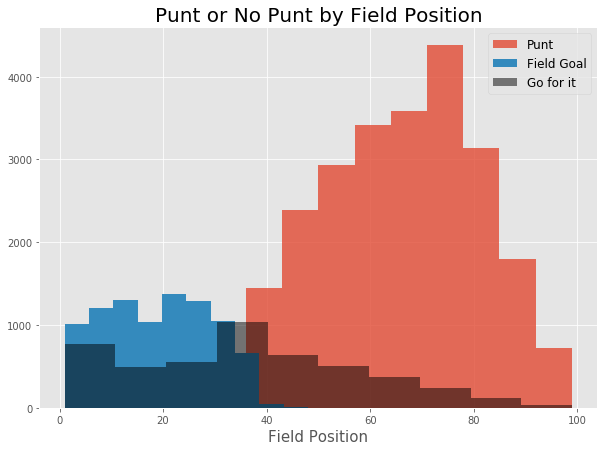

In [81]:
plt.figure(figsize=(10,7))
plt.title('Punt or No Punt by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.hist(punt_df['yardline_100'].dropna().values, bins=10, alpha=0.8, label='Punt')
plt.hist(fg_df['yardline_100'].dropna().values, bins=10, alpha=1, label='Field Goal')
plt.hist(run_pass_df['yardline_100'].dropna().values, bins=10, alpha=0.5, label='Go for it', color='k')
#plt.fill_between(x, np.exp(logprob), alpha=0.5)
plt.legend(fontsize='large')

In [ ]:
not_punt_df = df_4[df_4['play_type'] != 'punt']

In [94]:
not_punt_df
punt_df
run_pass_df
fg_df

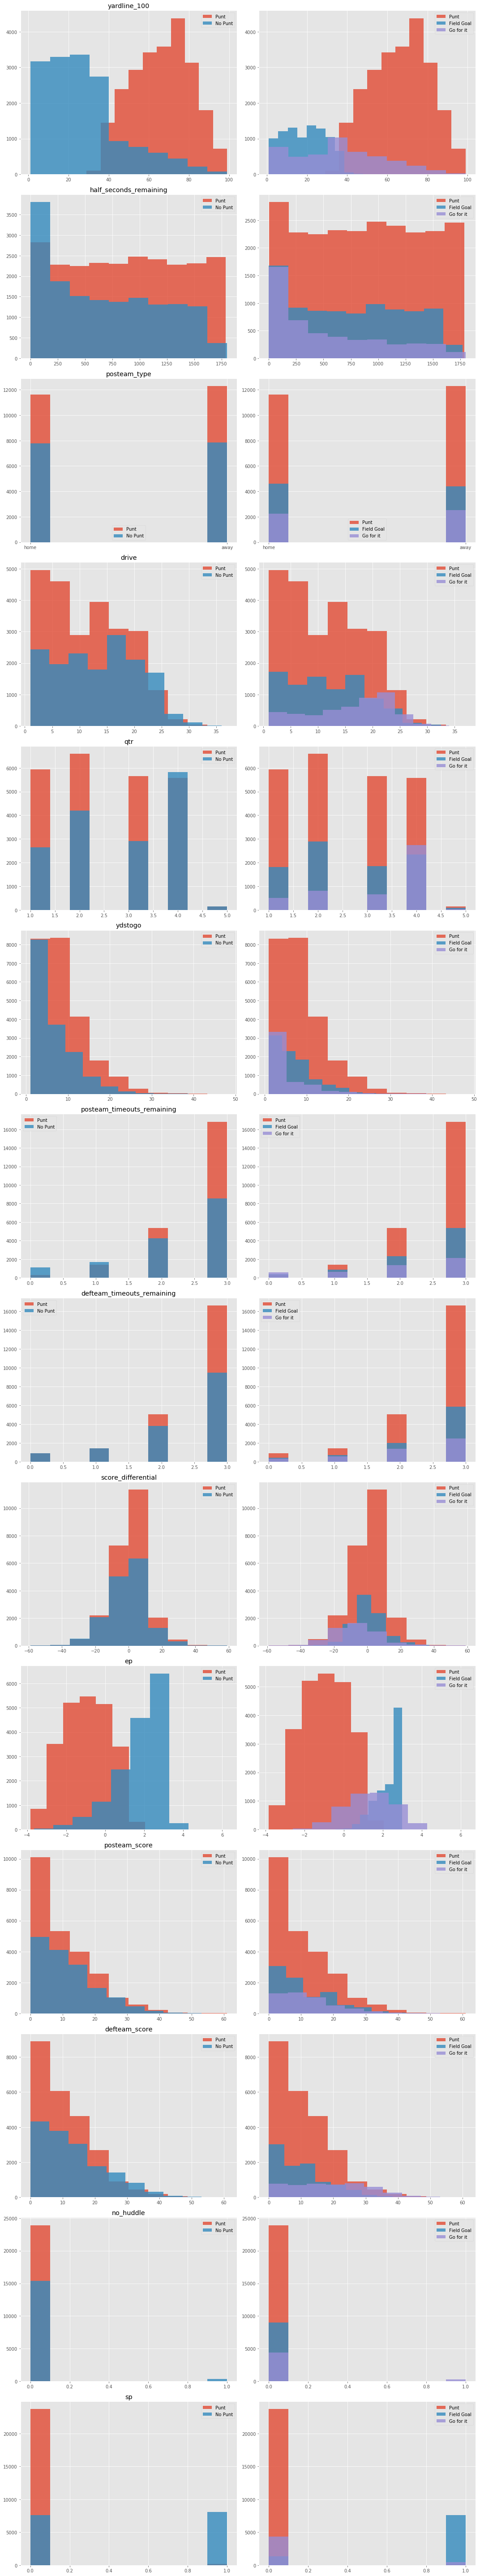

In [129]:
fig, ax = plt.subplots(14, 2, figsize=(15,80))
features = ['yardline_100', 'half_seconds_remaining', 'posteam_type', 'drive', 'qtr', 
            'ydstogo', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 
            'score_differential', 'ep', 'posteam_score', 'defteam_score', 'no_huddle', 'sp']
for i, feature in enumerate(features):
#for i, x in enumerate(features):
    #for j in range(2):
    ax[i, 0].hist(punt_df[feature].dropna().values, label='Punt', alpha=0.8)
    ax[i, 0].hist(not_punt_df[feature].dropna().values, label='No Punt',alpha=0.8) 
    ax[i, 0].legend()
    #ax[i, 0].tight_layout()
    
    ax[i,1].hist(punt_df[feature].dropna().values, label='Punt', alpha=0.8)
    ax[i,1].hist(fg_df[feature].dropna().values, label='Field Goal', alpha=0.8)  
    ax[i,1].hist(run_pass_df[feature].dropna().values, label='Go for it', alpha=0.8)
    ax[i, 0].set_title(feature)
    #ax[i, 1].tight_layout()
    
    ax[i, 1].legend()
        #ax[1,0].hist(punt_df['ydstogo'])
fig.tight_layout()

In [148]:
df_4[df_4['sp'] == 0]['play_type'].unique()
#sp whether or not the play scored

array(['punt', 'field_goal', 'no_play', 'pass', 'run', nan, 'qb_kneel'],
      dtype=object)

In [150]:
df_4[df_4['sp'] == 1]['play_type'].unique()

array(['field_goal', 'punt', 'run', 'pass', 'no_play'], dtype=object)

In [160]:
df_4.groupby('game_id')['play_id'].count().mean()

15.694378463974664

In [161]:
df_4.shape

(39644, 256)